# Table Of Content

- [1 - Background](#1)
- [2 - Understanding PED](#2)
- [3 - Importing Libraries](#3)
- [4 - EDA](#4)
- [5 - Combined data](#5)
     - [5.1 - Exploring combined data](#5.1)
     - [5.2 - Uncovering Facets](#5.2)
     - [5.3 - EDA Combined data](#5.3)
- [6 - Modeling](#6)
- [7 - Modeling application on all products](#7)
     - [7.1 - Optimal Price for Max Profit](#7.1)
     - [7.2 - Optimal Price for Max Profit for All items](#7.2)
- [8 - Conclusion](#8)

<a name='1'></a>
### Price Optimization based on price elasticity of demand

**Price Optimization**  Is the use of analysis by a company to understand how customers will response to the prices of their products or services (buying patterns) and it is also used to determine what prices should be, be it in an on-line or off-line store so that the company can meet most of their objectives. Some of the objectives could be to get: 

More profit, More revenue etc
The data to achieve this vary a lot could be survey data, previous sales data etc

**Use Cases** Retail, Airlines, banking, hotel, local

**Who needs pricing?** Analyst or business owners

**Strategies to price products?**

- Cost plus pricing(most simplest form): Say you selling something for $\$100$ and you decided you want  a profit of $\$10$ so your selling price is $\$110$. you decide this based on your total procurement price, maintenance price, production price i.e what ever the cost is, you will add a percentage to it.
- Competition based pricing : based on what competitors are pricing you decide that you can go a certain percentage less.
- Perceived value based pricing: Understand what value does the particular product has on customers how they perceived these products and value accordingly e.g a lot of luxury base goods where the prices is not based on the cost of materials, how much does it takes to produce, how much to distribute or what are competitors pricing. Its just that of higher value to customer and hence price is more.
- Demand based pricing: based on demand of product you can decide on your pricing i.e if demand is high, you can higher your prices and if low you can put in some promo or discount or lower prices.
- Price Elasticity

**What should i price my products** depends on a number of questions and end goals, do i want to increase number of sales as in increasing the number of goods you are selling i.e profit and revenue is not at forefront in your head or is it you want more footfall in your store/website i.e whenever amazon want to break into the market to put huge discounts, or you want to increase more revenue and more profit(What we are interested in).

**How can i price my products with the sales data i have** 
- Sales data
- Property - price elasticity: A measure of the responsiveness of quantity demanded or supplied of a good to a change in price. It can be,
  - elastic products- Consumers are responsive to price change (patterns change based on their price) This is our point of focus.
  - Inelastic products - Consumers are not responsive to price change (sales are not much affected by price changes i.e luxury goods.)

<a name='2'></a>
### Price Elasticity

Price elasticity of demand (PED) measure use to show the responsiveness of the quantity demanded of a good or services to changes in price when nothing else is change i.e relationship between demand and price. i.e the effective desire for something changes as price changes. It gives the % change in quantity for 1 % increase in price
Mathematically 
$$ e = \frac{\Delta Q}{\Delta P}$$

We will look at sales of Cafe that sales burgers, the Cafe owner wants to know the optimal price to set for their item in order to gain maximum profit. Note. If the prices are high, the sales will reduce and if the prices are low the sales will increase and hence total profit will decrease. So the task here is to get a sweet spot that will give us the maximum profit. So we are trying to find a linear relationship between quantity and price hence use a linear regression in this case

<a name='3'></a>
### Loading the libraries and dataset

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Load data
sold = pd.read_csv("Cafe+-+Sell+Meta+Data.csv")
transaction = pd.read_csv("Cafe+-+Transaction+-+Store.csv")
date_info = pd.read_csv("Cafe+-+DateInfo.csv")

In [5]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


<a name='4'></a>
### Exploratory data analysis

In [6]:
# check data types
sold.dtypes

SELL_ID           int64
SELL_CATEGORY     int64
ITEM_ID           int64
ITEM_NAME        object
dtype: object

In [7]:
sold.describe()
sold.describe(include= ["O"])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [8]:
# check missing values, non and it shouldn't be
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product 1-to-1 relation with item_name.

ITEM_NAME: a categorical variable, identifying the name of the item

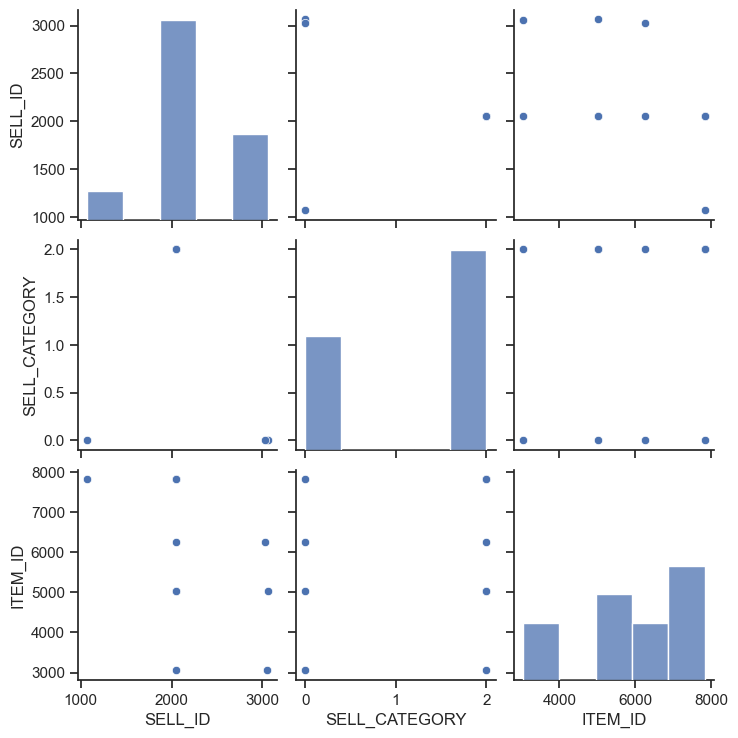

In [9]:
# distributions of variables
# scatterplot of numeric variables
sns.pairplot(sold)

In [10]:
# view data set
transaction.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [11]:
# inferences on all features
transaction.describe()
transaction.describe(include=['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [12]:
# check for null values
transaction[transaction.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Important: It’s supposed the PRICE for that product in that day will not vary.

In details:
CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,  240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586, 15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

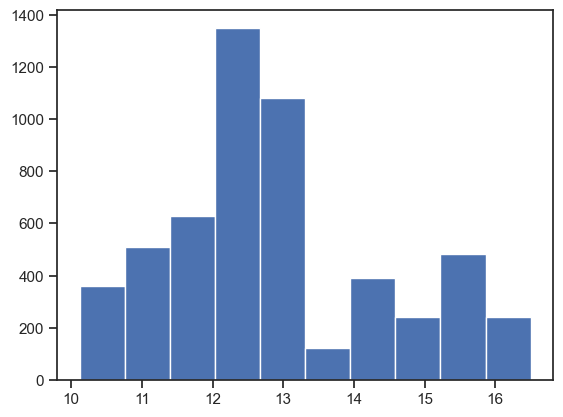

In [13]:
plt.hist(transaction.PRICE)

- One can easily argue that this is a bi-modal distribution as it peaks at two points. 
- It can be a combination of many distributions.

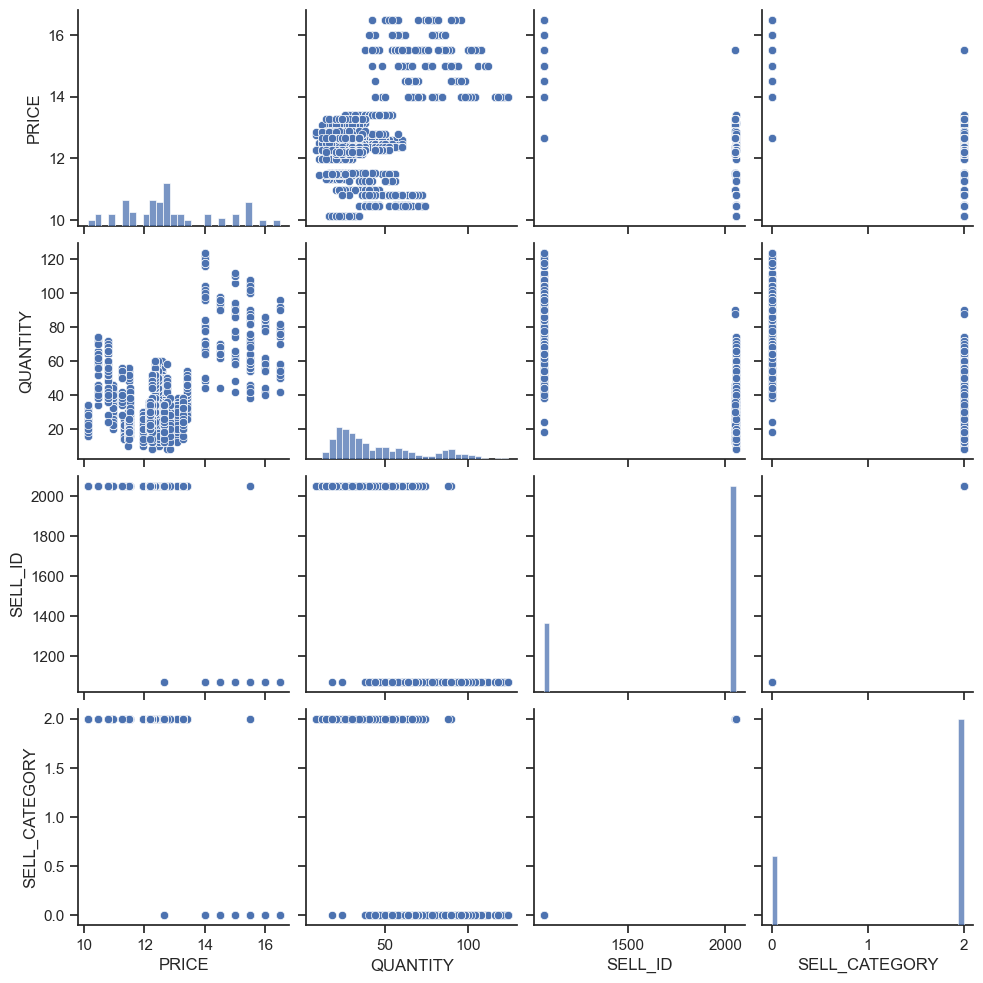

In [14]:
# univariate and bivariate analysis
sns.pairplot(transaction)

In [15]:
# view dataset
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [16]:
# inferences on all features
date_info.describe()
date_info.describe(include=['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [17]:
# data types
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [18]:
# check for nulls
# a lot of missing values in holiday
date_info[date_info.isnull().any(axis=1)].head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0


In [19]:
# replace missing values
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0


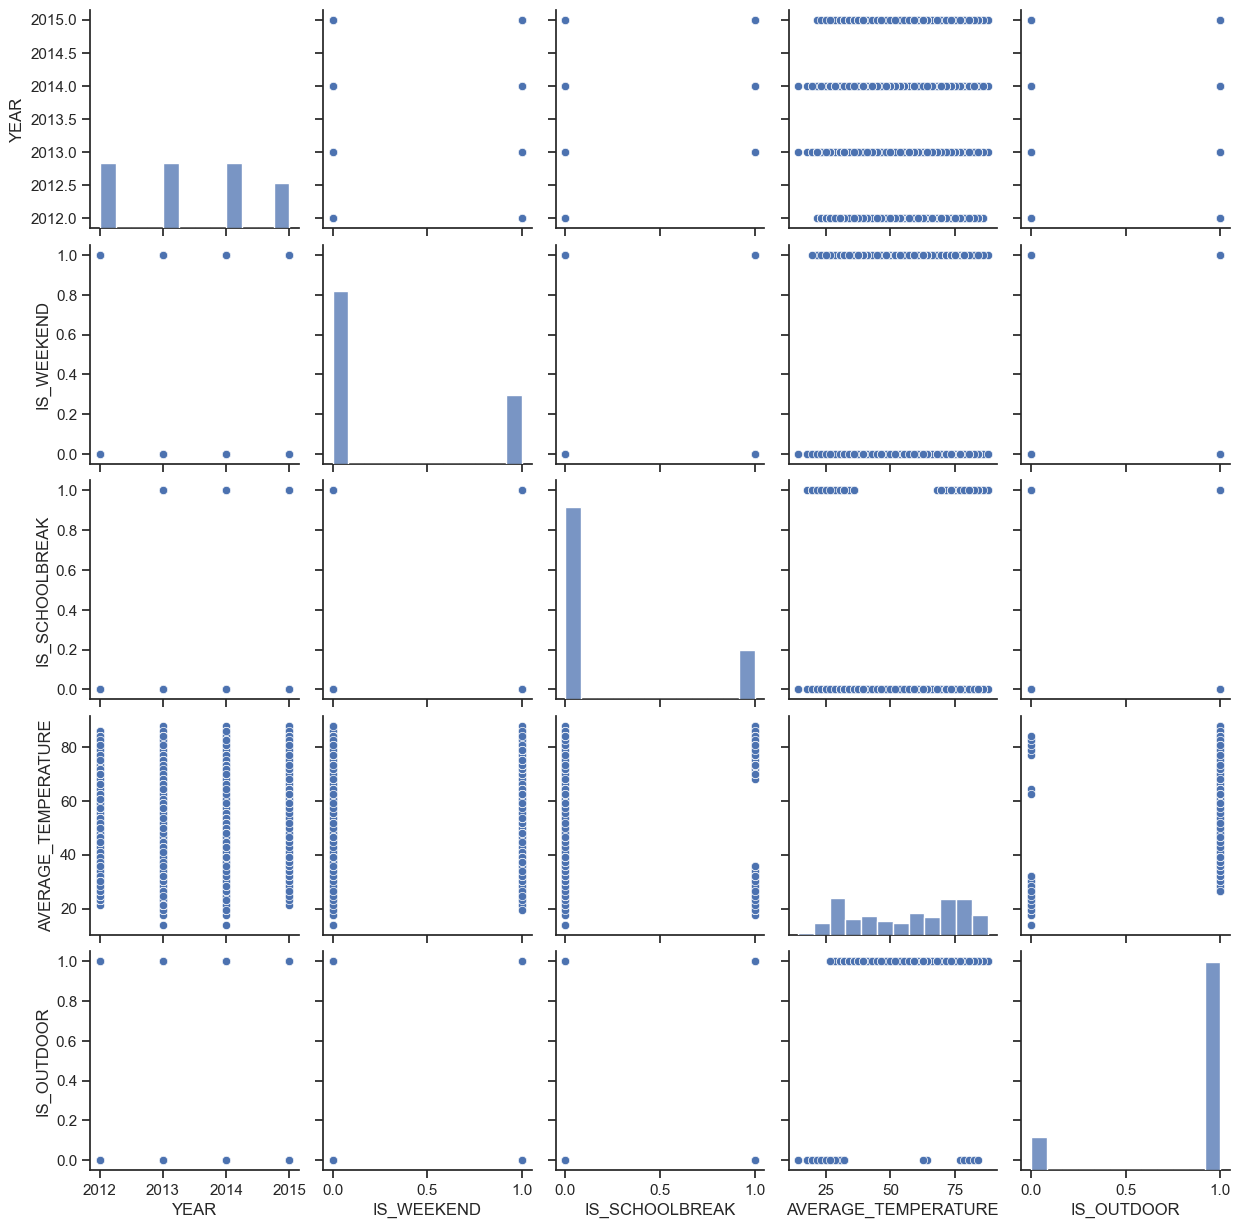

In [20]:
# pairplot for distribution
sns.pairplot(date_info)

- A lot of them are categorical variables, not much to infer from the plots distributions.

#### Further eda

In [21]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year', 'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [22]:
date_info['HOLIDAY'].value_counts()

HOLIDAY
No Holiday              1244
Luner New Year            28
National Day              21
Qing Ming Festival        12
Labor Day                 12
Dragon Boat Festivel      12
New Year                  10
Mid-Autumn Day             7
WWII Celebration           3
Name: count, dtype: int64

In [23]:
# oldest date
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [24]:
# earliest date
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [25]:
# shape of data frame
date_info.shape

(1349, 7)

In [26]:
# check if any null values
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [27]:
# lets transpose some columns in item name i.e encoding them and concat with sell_id
# concatenate along columns i.s axis=1
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,True,False,False,False
1,3055,False,True,False,False
2,3067,False,False,True,False
3,3028,False,False,False,True
4,2051,True,False,False,False
5,2051,False,False,True,False
6,2052,True,False,False,False
7,2052,False,False,False,True
8,2053,True,False,False,False
9,2053,False,False,True,False


- Noticed that sell id is not unique, i.e for burger 1070, 2051, 2052 we can consolidate this and make things easier by getting a unique sell id.

In [28]:
# get unique sell id for each row
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


<a name ='5'></a>
### Combined data


In [29]:
# merge and drop unneccesary columns
merge_data1 = pd.merge(sold.drop(['ITEM_ID'], axis=1), transaction.drop(['SELL_CATEGORY'], axis=1), on= 'SELL_ID')
merge_data1.head(20)

# Make merge_data1 unique on combination of all return features
unique_merge_data1 = merge_data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [30]:
unique_merge_data1.head(20)

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5      46
                                   01/01/13       15.5      60
                                   01/01/14       15.5      72
                                   01/01/15       14.0      66
                                   01/02/12       15.5      70
                                   01/02/13       15.5      68
                                   01/02/14       15.5      76
                                   01/02/15       14.0     102
                                   01/03/12       15.5      62
                                   01/03/13       15.5      70
                                   01/03/14       15.5      68
                                   01/03/15       14.0      68
                                   01/04/12       15.5      88
                                   01/04/13       15.5     100
                                   01/04/14       15.5      74

In [31]:
# shape of merge data
merge_data1.shape
intermediate_data = unique_merge_data1.reset_index()

(10808, 6)

In [32]:
unique_merge_data1.shape

(10792,)

In [33]:
# view data
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [34]:
# check dates
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [35]:
# check dates, noticed obs dropped by a year
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [36]:
# incorporate the date_info data
combined_data = pd.merge(intermediate_data, date_info, on= 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


In [37]:
# check shape
combined_data.shape

(6696, 12)

In [38]:
# check for missing values
# no missing values
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [39]:
# check various categories
np.unique(combined_data.HOLIDAY)
np.unique(combined_data.IS_WEEKEND)
np.unique(combined_data.IS_SCHOOLBREAK)

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year', 'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [40]:
# These attributes are very important in our sales but has nothing to do with price, i.e if Holiday then sales increases, 
# if schoolbreak and weekend then sales will increase. we don't want this effect as we only interested in seeing price effect.
# all effects on sales other than price will be removed from the data set. 
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & 
                         (combined_data['IS_WEEKEND']==0)]
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


In [41]:
# shape of dataframe
bau_data.shape

(3768, 12)

In [42]:
# Check categories
np.unique(bau_data.HOLIDAY)
np.unique(bau_data.IS_WEEKEND)
np.unique(bau_data.IS_SCHOOLBREAK)

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

In [43]:
# check if weekend was removed
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [44]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


<a name='5.1'></a>
#### Exploratory Data Analysis for combined

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,  471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

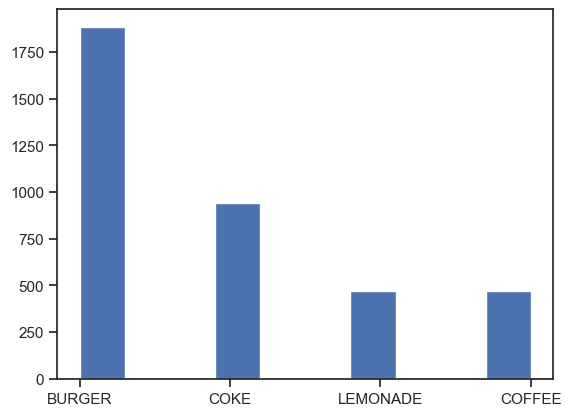

In [45]:
# item name
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,   64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586, 15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

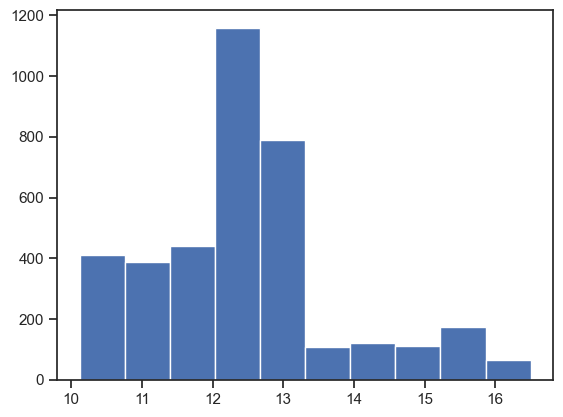

In [46]:
# Price
plt.hist(bau_data.PRICE)

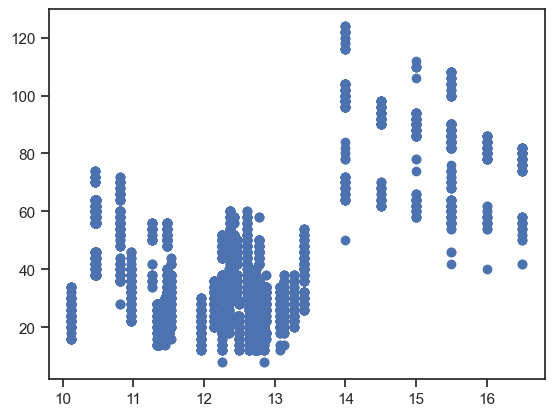

In [47]:
# Price vs Quantity in combined data set
plt.scatter(combined_data.PRICE, combined_data.QUANTITY)

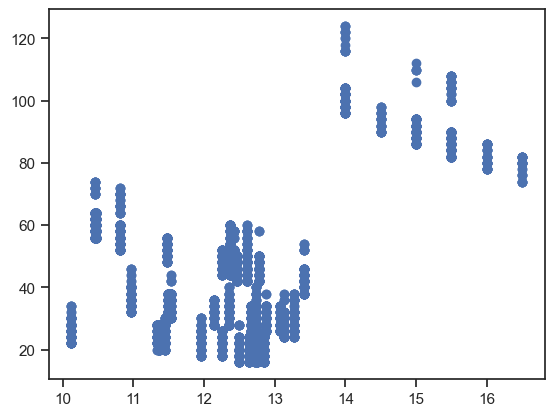

In [48]:
# in bau data set this does not contain the special days
plt.scatter(bau_data.PRICE, bau_data.QUANTITY)

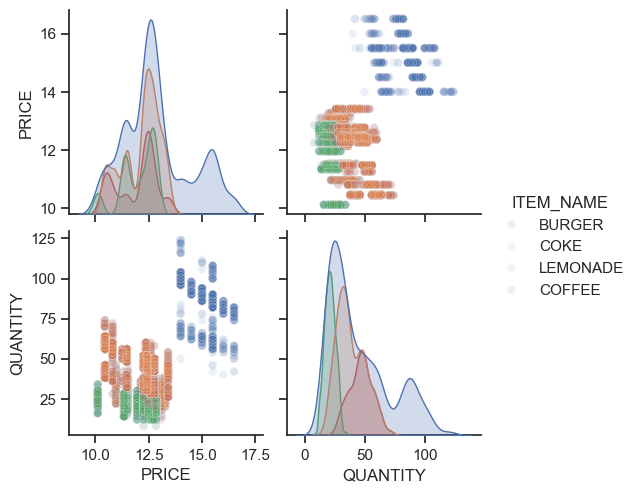

In [49]:
# pairplot for combined data 
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

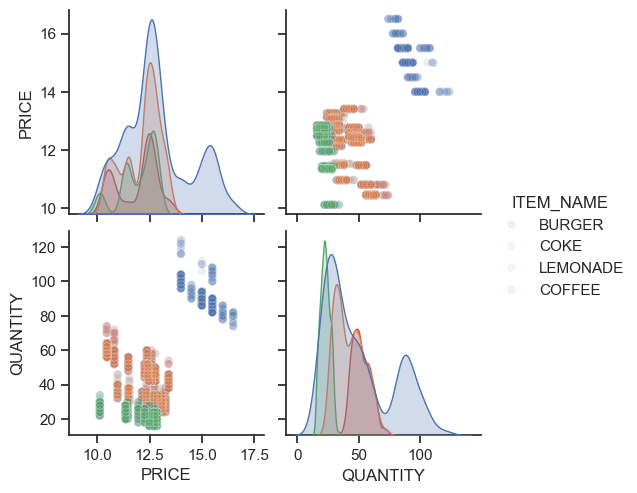

In [50]:
# pairplot for bau data
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. We Can go ahead and calculate the price elasticities for this.

<a name='5.2'></a>
#### Uncovering facets of data with visualization

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

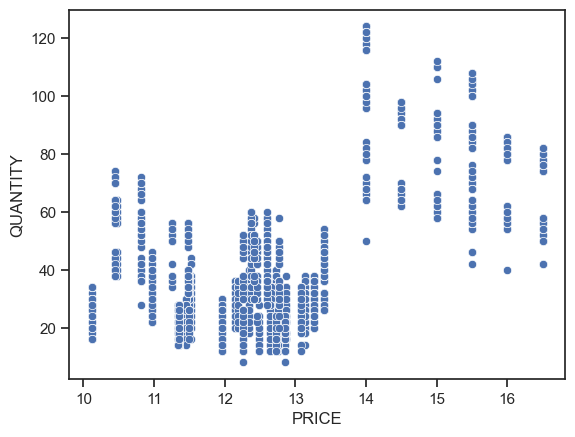

In [51]:
# Facets of burger
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape 
burger.describe()
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY)

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distribution when we differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately.

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

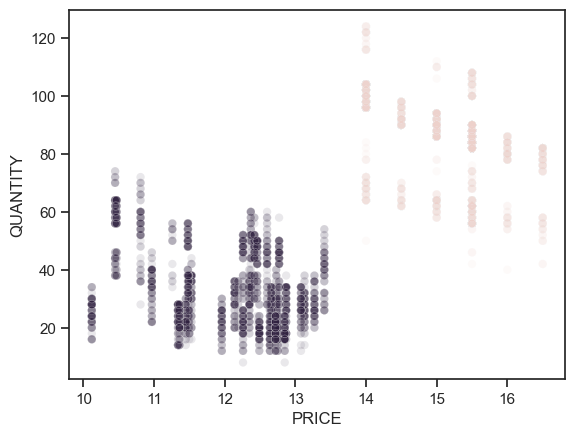

In [52]:
# alpha for opacity, legend could be full to see various SELL_ID and combo
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [53]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [54]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

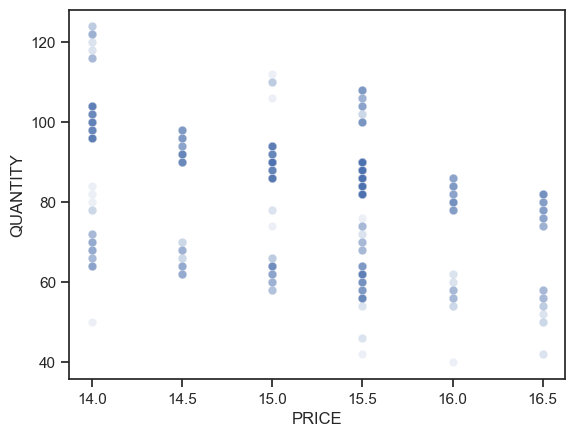

In [55]:
# create visuals for particular sell id a combo with burger
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

* Therefore SELL_ID is one of the factors that is also creating these different groups and different behaviors therefore it is idea to split the data with each ITEM_NAME. since we can't fit the model with a data with two distributions as seen in post.

<a name='6'></a>
### Modeling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.45e-32
Time:                        14:38:58   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

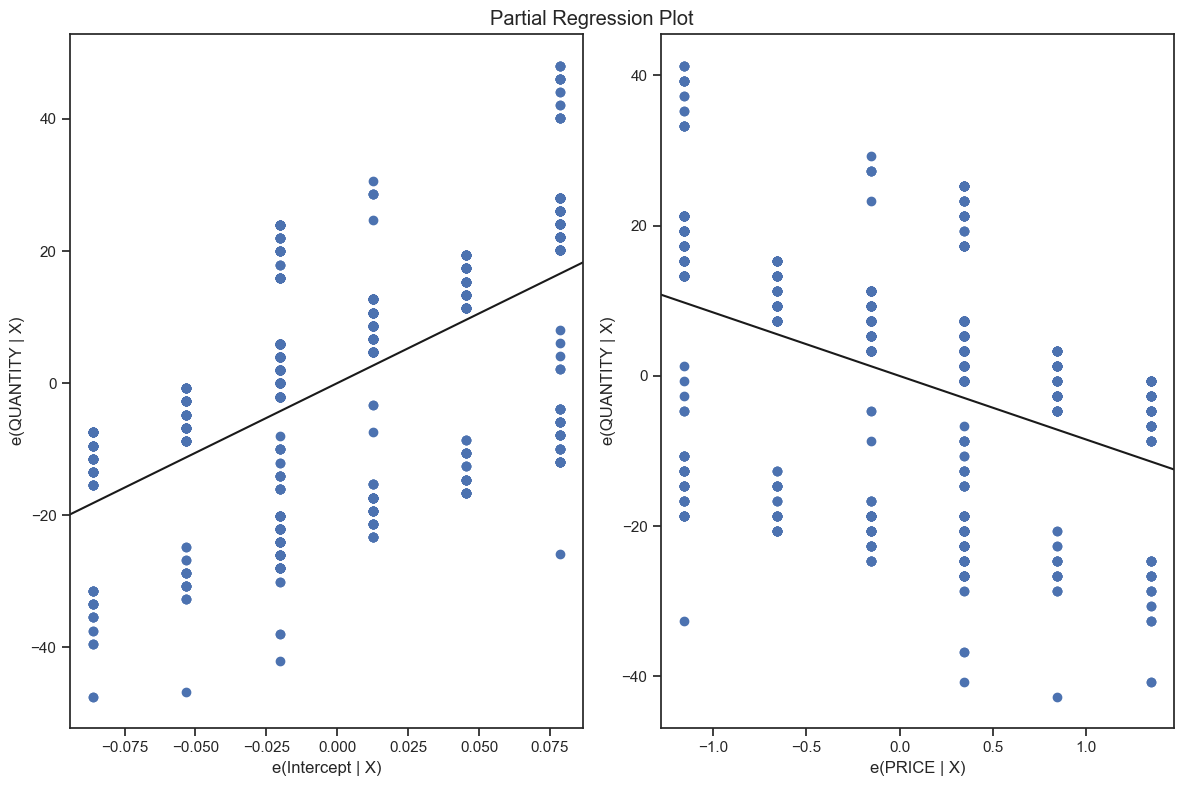

In [56]:
# using combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit() 
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

* Huge variations, model is not fitting well the data because of less R-squared. Lets observe the data after we have removed holidays weekend and School break. 

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


(1884, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

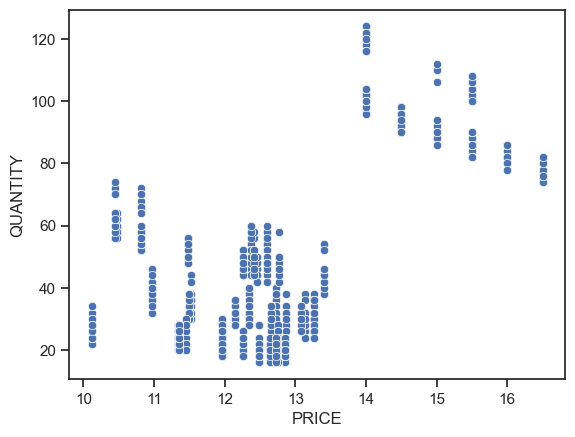

In [57]:
# bau dataset subseted on item name burger
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY)

* Some of the right region missing in the graph corresponds to special days and holidays.

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

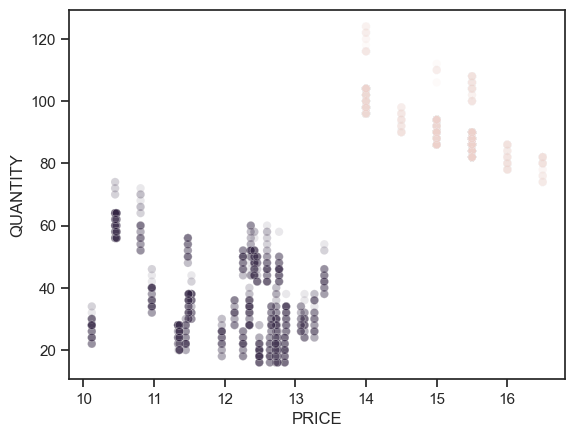

In [58]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data=burger, x =burger.PRICE, y= burger.QUANTITY, hue= 'SELL_ID', legend=False, alpha=0.1)

In [59]:
# unique sell id, the bau data has all the SEll ids
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [60]:
# bau data has the unique sell ids
np.unique(bau_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,471.0,471.0,471.000000,471.000000,471.000000,471.0,471.0,471.000000,471.000000
mean,1070.0,0.0,15.124204,91.622081,2013.186837,0.0,0.0,53.691720,0.883227
std,0.0,0.0,0.705577,9.437897,1.059464,0.0,0.0,18.736854,0.321491
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,70.700000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

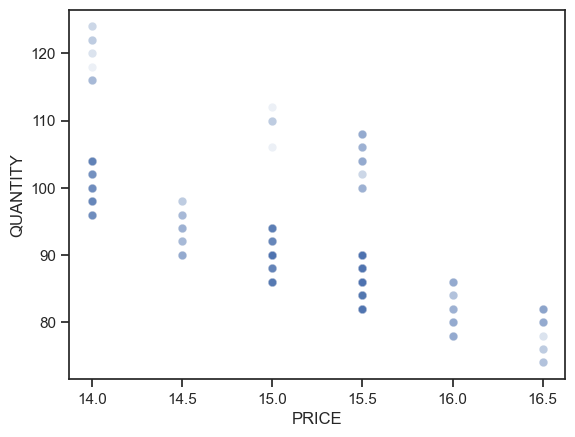

In [61]:
# subset sell id 1070 burger and combo

burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data= burger_1070, x =burger_1070.PRICE, y= burger_1070.QUANTITY, alpha=0.1)


* The scatter plot is much cleaner, Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.16e-70
Time:                        14:39:18   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

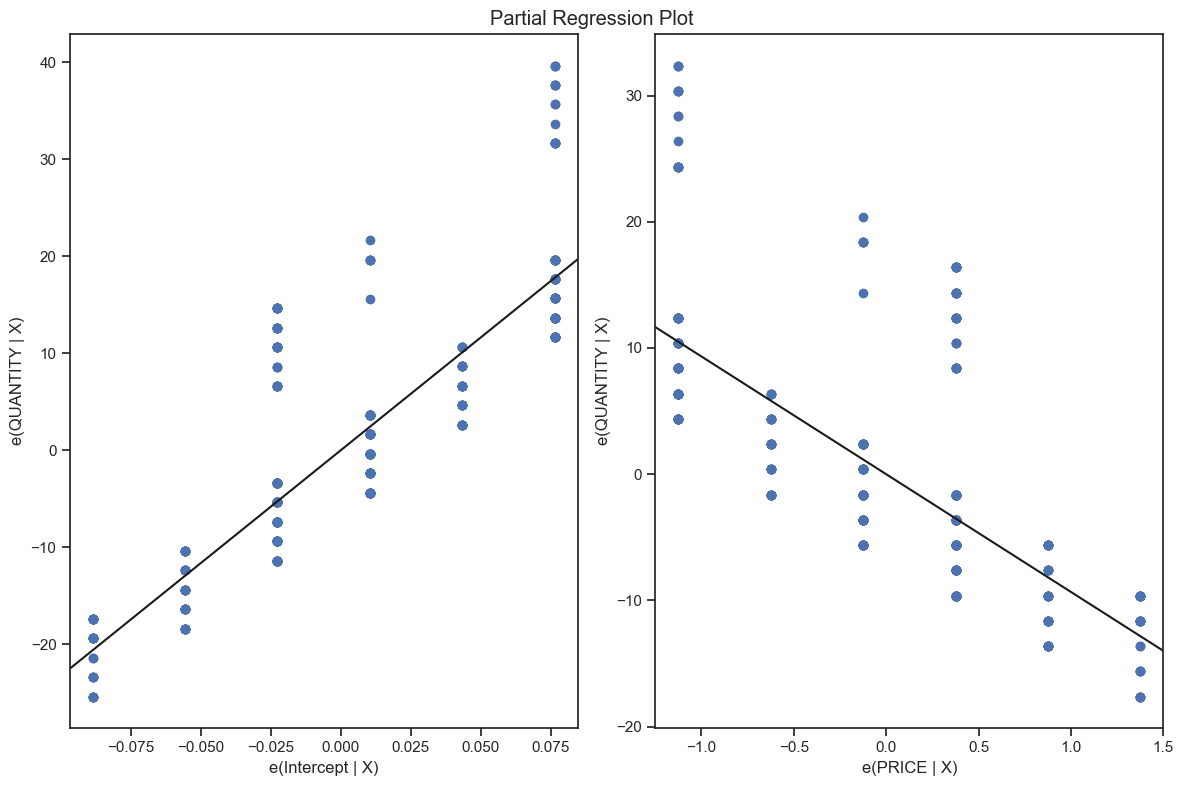

In [62]:
# fit ols model on the new data
burger_model = ols('QUANTITY ~ PRICE', data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

* Variation has decreased due to R-Squared increase and model captures the trend better. however we can see two separate trends
* We will explore the data again to see if any thing else in the data we can use to further refine our model

In [63]:
# look at the data again
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


In [64]:
# doesn't sure what outdoor means, lets filter outdoor aswell
bau2_data = combined_data[(combined_data['HOLIDAY'] == 'No Holiday') & (combined_data['IS_SCHOOLBREAK'] ==0) & 
                          (combined_data['IS_WEEKEND'] == 1) & (combined_data['IS_OUTDOOR'] ==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
8,1070,0,BURGER,1/15/12,15.5,60,2012,No Holiday,1,0,32.0,1
23,1070,0,BURGER,1/18/15,14.0,68,2015,No Holiday,1,0,33.8,1
26,1070,0,BURGER,1/19/14,15.5,56,2014,No Holiday,1,0,30.2,1
60,1070,0,BURGER,1/28/12,15.5,62,2012,No Holiday,1,0,32.0,1
81,1070,0,BURGER,10/11/14,15.5,60,2014,No Holiday,1,0,62.6,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,164.0,164.0,164.000000,164.000000,164.000000,164.0,164.0,164.000000,164.0
mean,1070.0,0.0,15.143293,61.707317,2013.195122,1.0,0.0,57.408537,1.0
std,0.0,0.0,0.695660,4.568464,1.084628,0.0,0.0,15.850085,0.0
min,1070.0,0.0,14.000000,50.000000,2012.000000,1.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.875000,58.000000,2012.000000,1.0,0.0,42.800000,1.0
50%,1070.0,0.0,15.500000,62.000000,2013.000000,1.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,64.000000,2014.000000,1.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,72.000000,2015.000000,1.0,0.0,84.200000,1.0


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

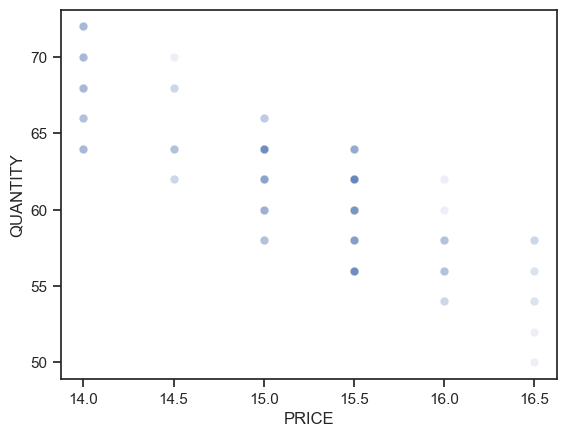

In [65]:
# create combo with burger data set
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data= burger_1070, x = burger_1070.PRICE, y= burger_1070.QUANTITY, alpha= 0.1)

* Much cleaner plot with only one group

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     320.1
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.29e-40
Time:                        14:39:31   Log-Likelihood:                -391.92
No. Observations:                 164   AIC:                             787.8
Df Residuals:                     162   BIC:                             794.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.7431      4.534     31.484      0.0

<Figure size 1200x800 with 0 Axes>

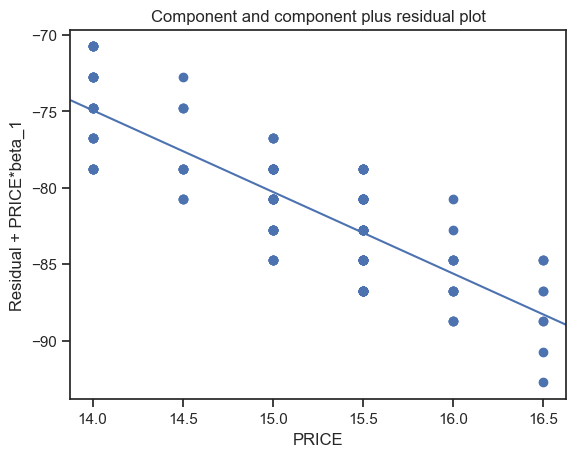

In [66]:
# creating model on this data
burger_model = ols("QUANTITY ~ PRICE", data= burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

* Shows clear trend, clear line with small variations we can confidently say that for this particular cafe for the burgers which has a sell_id of 1070 the Price coefficient is approximately -5.3513 and hence the price elasticity is -5

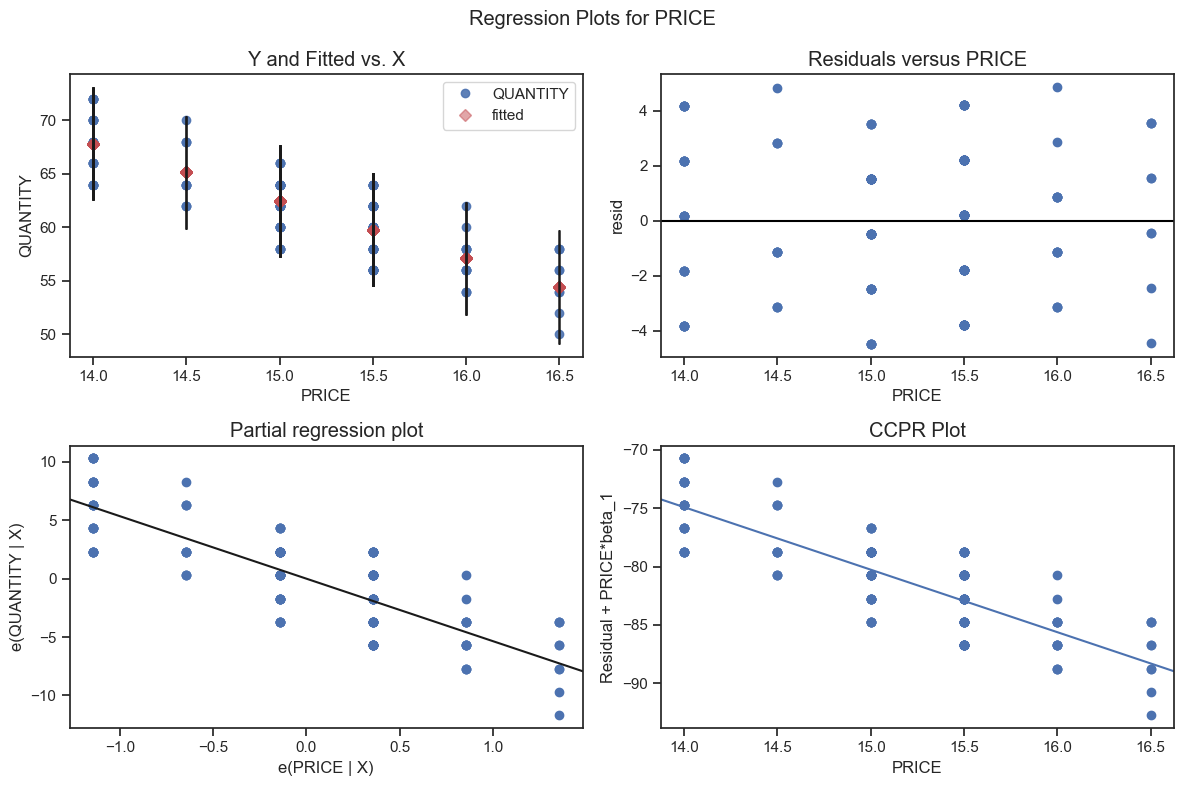

In [67]:
# lets view same model in antoher way
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

* Now we have figured out how we can calculate the price elasticity for a particular item burger with sell id 1070, we will extend this to other items.

<a name='7'></a>
### Applying Model on All Products

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
837,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
838,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
839,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
840,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
841,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

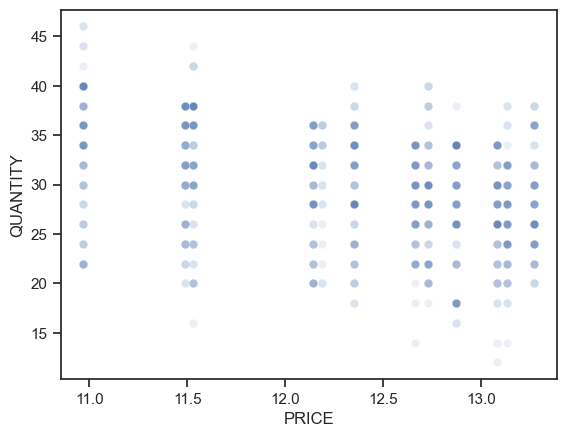

In [68]:
# just cross-checking burger and combo with sell id 2051
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data= burger_2051, x = burger_2051.PRICE, y= burger_2051.QUANTITY, alpha=0.1)

* graph doesn't look bad as its not all over the place.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           4.45e-27
Time:                        14:39:44   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

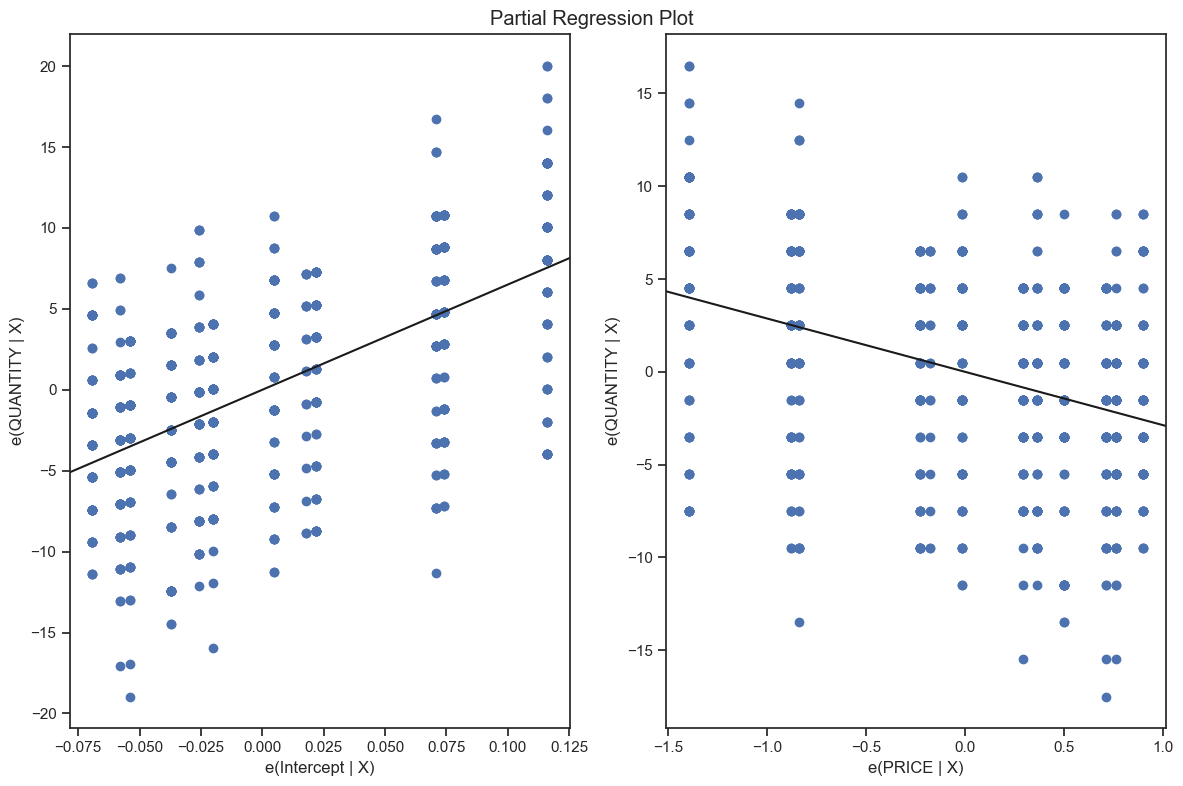

In [69]:
burger_model = ols('QUANTITY ~ PRICE', data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

* Again R-squared very low even though it is capturing the downward trend but we still see a lot variation

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1674,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
1675,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
1676,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
1677,2051,2,COKE,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
1678,2051,2,COKE,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

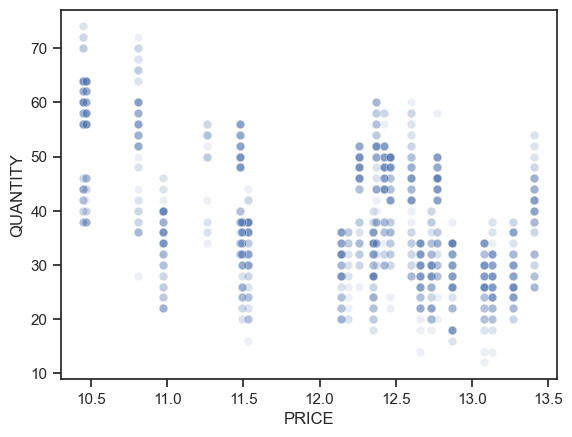

In [70]:
# look at coke
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y= coke.QUANTITY, alpha=0.1)

* Scatter plot not very clean with two separate groupings, lets try to fit a model, we see a better R-squared compared to that of burger but still low even though captures downward trend.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          1.94e-104
Time:                        14:39:53   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

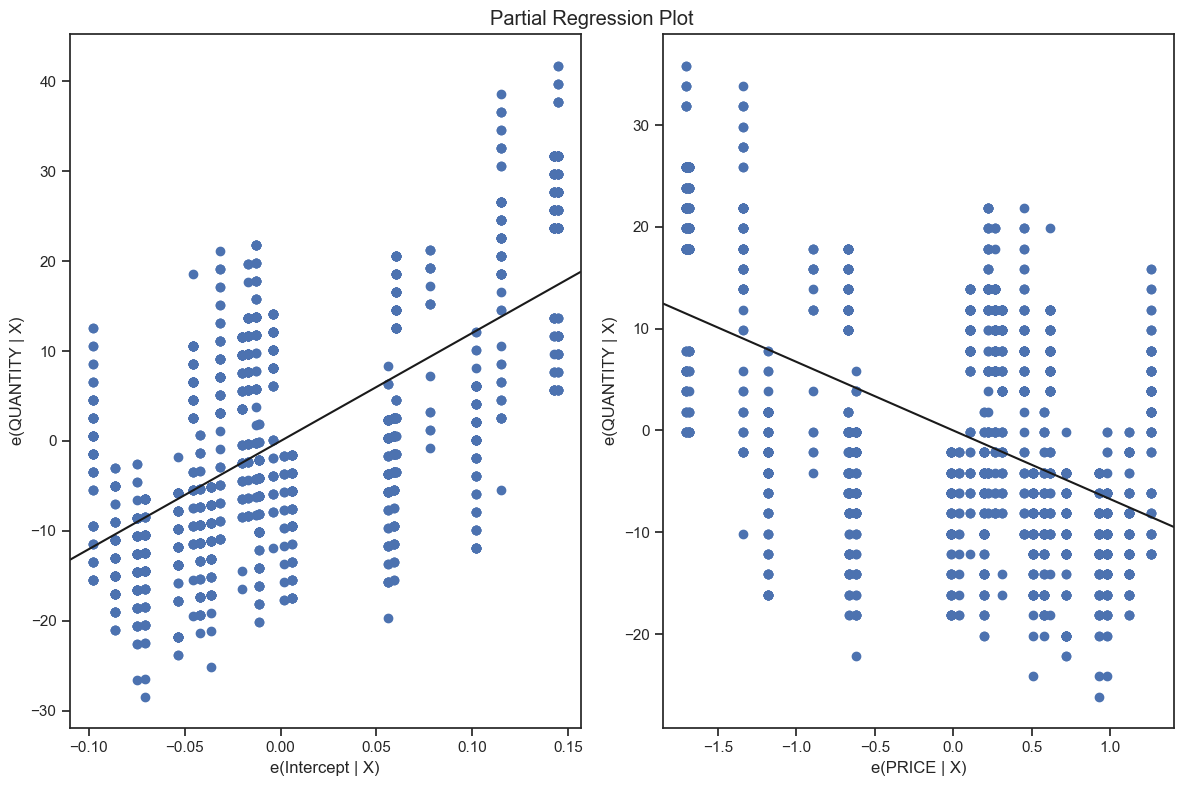

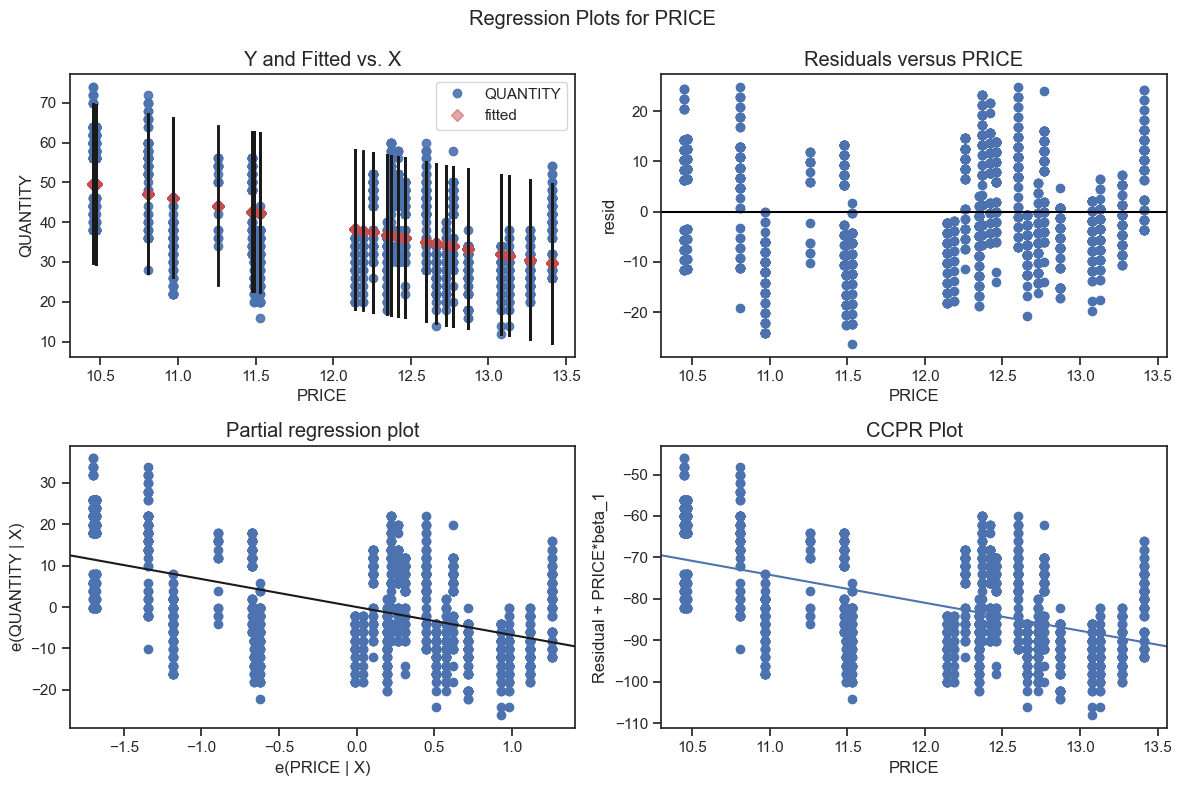

In [71]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(coke_model, "PRICE", fig = fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
5022,2053,2,COFFEE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
5023,2053,2,COFFEE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
5024,2053,2,COFFEE,1/13/14,12.37,60,2014,No Holiday,0,0,28.4,0
5025,2053,2,COFFEE,1/13/15,10.81,66,2015,No Holiday,0,0,28.4,0
5026,2053,2,COFFEE,1/14/12,12.60,42,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2053.0,2.0,11.934636,46.802867,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.947643,9.909910,1.063043,0.451373,0.400776,20.005316,0.327324
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,40.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,48.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.0,2.0,12.600000,54.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

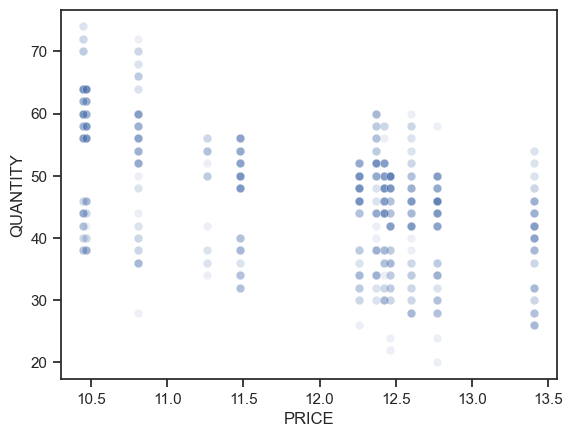

In [72]:
# Coffee
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE'] 
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

* Looks like two separate groupings, some price gap

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.20e-62
Time:                        14:40:03   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

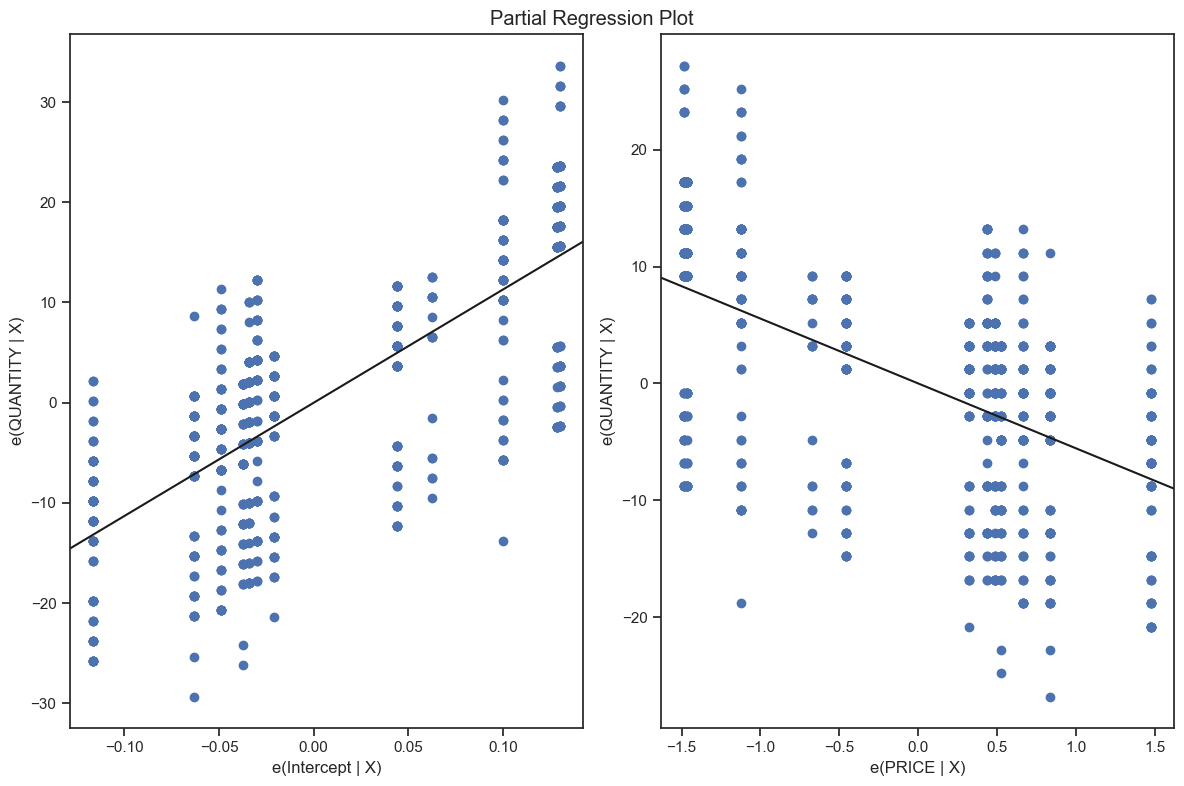

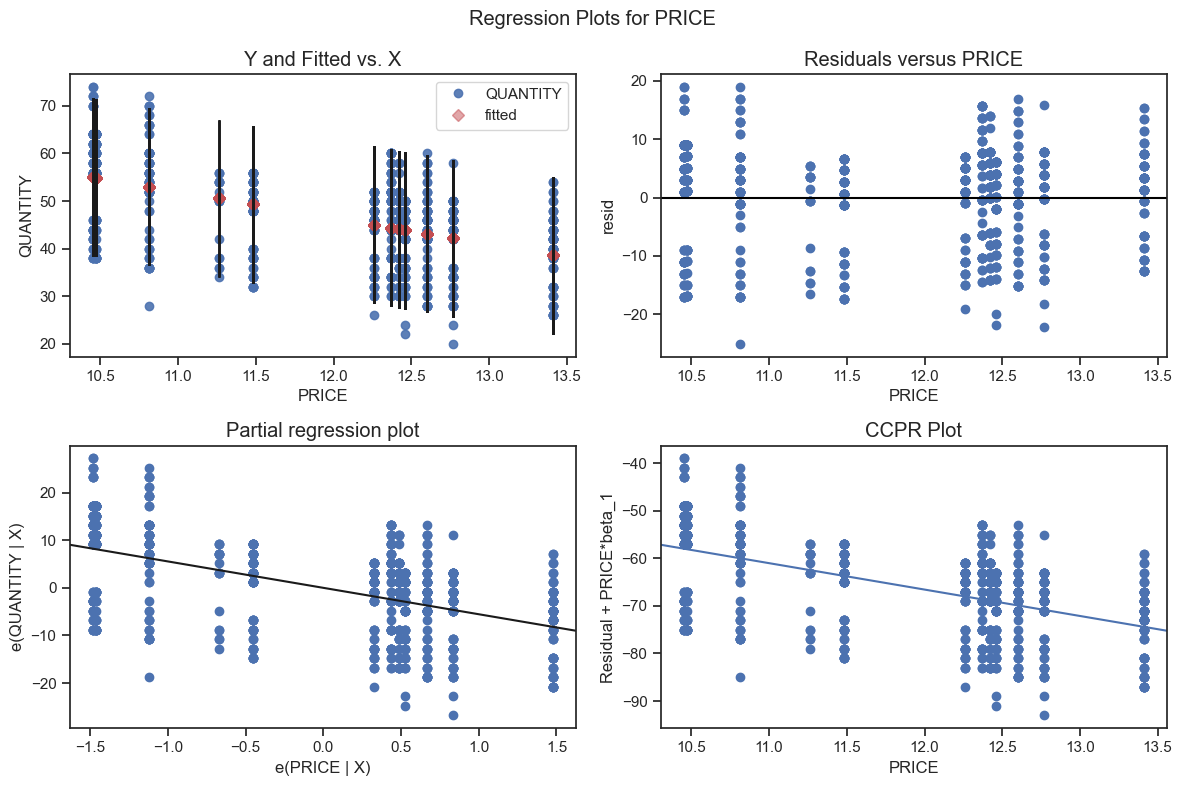

In [73]:
# build and fit the model
model = ols("QUANTITY ~ PRICE", data=coffee).fit() 
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

* Coefficient for price is -5 which means price elasticity is -5 

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3348,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
3349,2052,2,LEMONADE,1/13/13,12.64,18,2013,No Holiday,1,0,30.2,0
3350,2052,2,LEMONADE,1/13/14,11.96,24,2014,No Holiday,0,0,28.4,0
3351,2052,2,LEMONADE,1/13/15,11.45,28,2015,No Holiday,0,0,28.4,0
3352,2052,2,LEMONADE,1/14/12,12.75,20,2012,No Holiday,1,0,23.0,0


(837, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2052.0,2.0,11.976918,20.910394,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.820698,4.514501,1.063043,0.451373,0.400776,20.005316,0.327324
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,12.850000,34.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

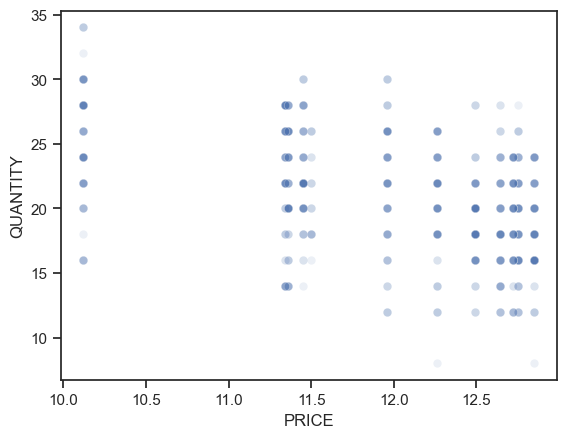

In [74]:
# Lemonade 
Lemonade_df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
Lemonade_df.head()
Lemonade_df.shape
Lemonade_df.describe()
sns.scatterplot(x = Lemonade_df.PRICE, y = Lemonade_df.QUANTITY , alpha = 0.1)

* Similar to previous beverages coke and coffee

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.46e-46
Time:                        14:40:11   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

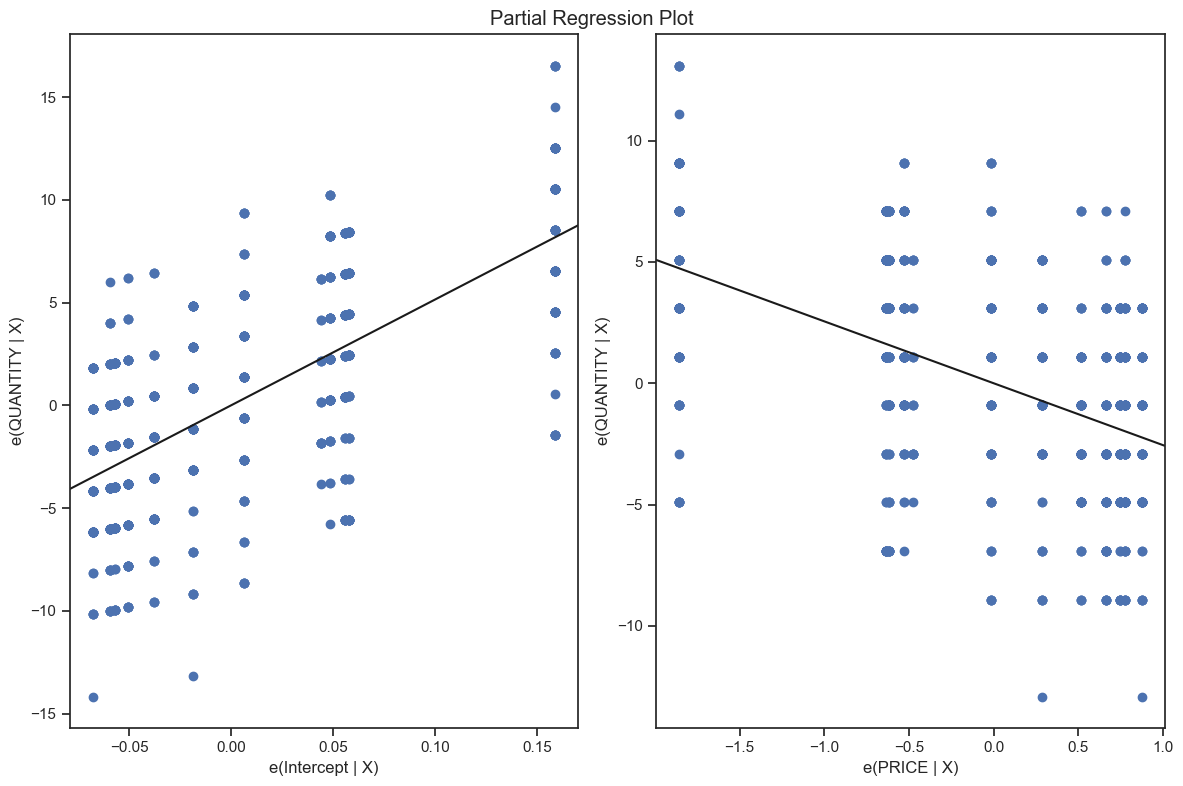

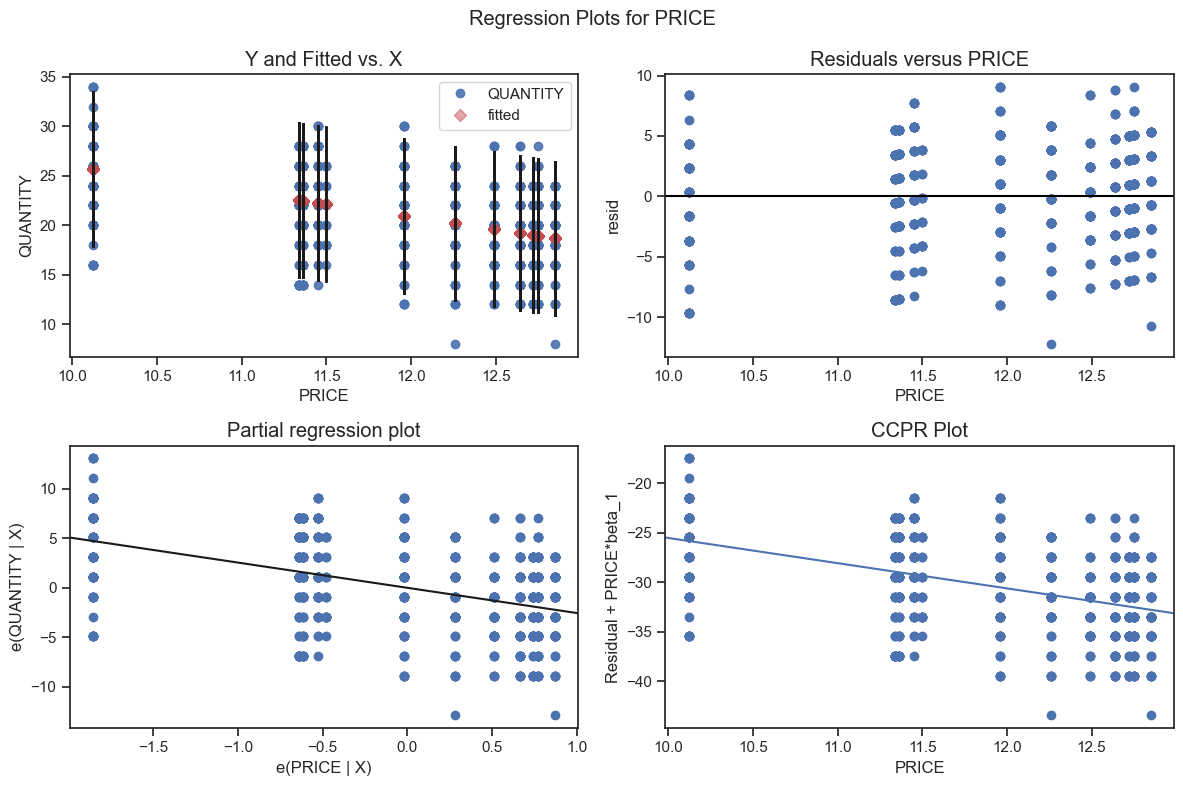

In [75]:
# fit model for lemonade
model = ols("QUANTITY ~ PRICE", data=Lemonade_df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

* Seems to have better R-squared compared to burger, with price elasticity  of -2.5, however same problem that seems to be there with all other items. 
* We will use a more clean function of the data and create a generic function that takes data as input and produce optimal results.

In [76]:
# lets find elasticities for all items
elasticities = {}

In [77]:
# Generic func to get price elasticities
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print('Price elasticiy of the product: ' + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12, 8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model 

Price elasticiy of the product: -5.351266740100881
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     320.1
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.29e-40
Time:                        14:40:21   Log-Likelihood:                -391.92
No. Observations:                 164   AIC:                             787.8
Df Residuals:                     162   BIC:                             794.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

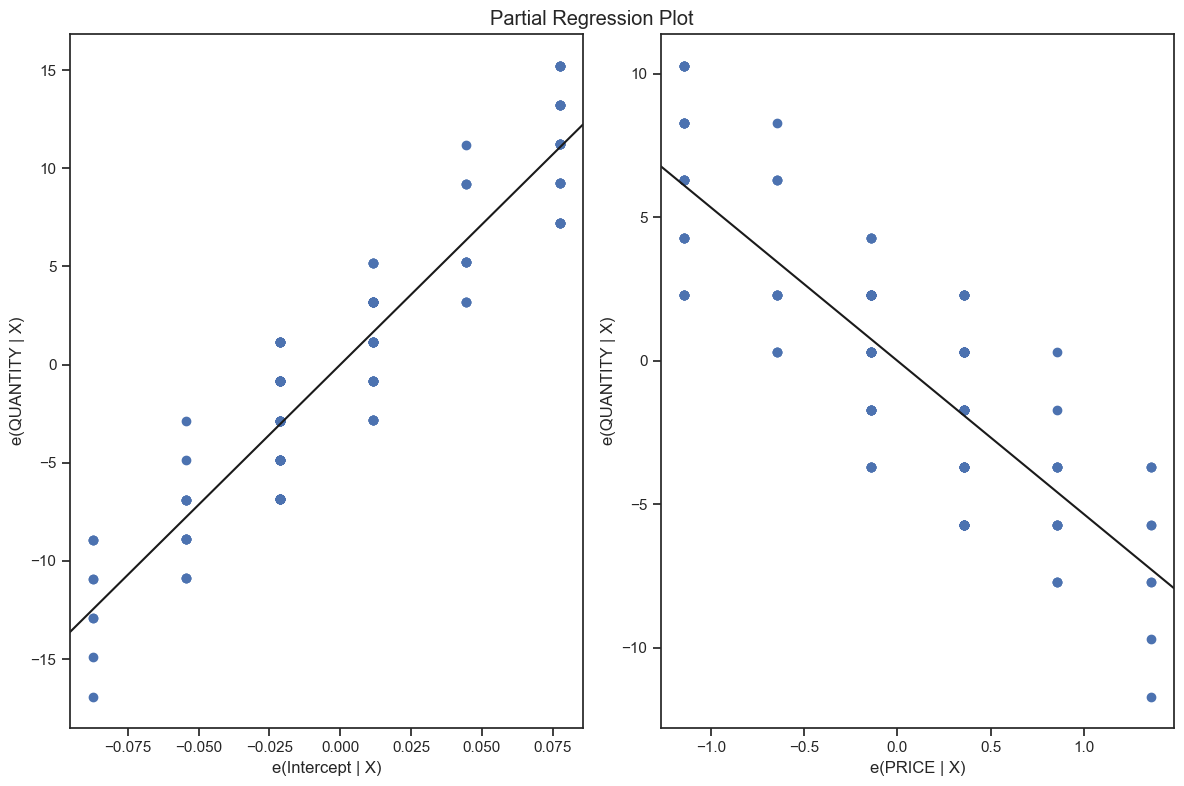

In [78]:
# apply function
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

* this particular trend shows that burger is very sensitive to price changes

Price elasticiy of the product: -1.353355848070377
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     21.83
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.22e-06
Time:                        14:40:25   Log-Likelihood:                -397.46
No. Observations:                 164   AIC:                             798.9
Df Residuals:                     162   BIC:                             805.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

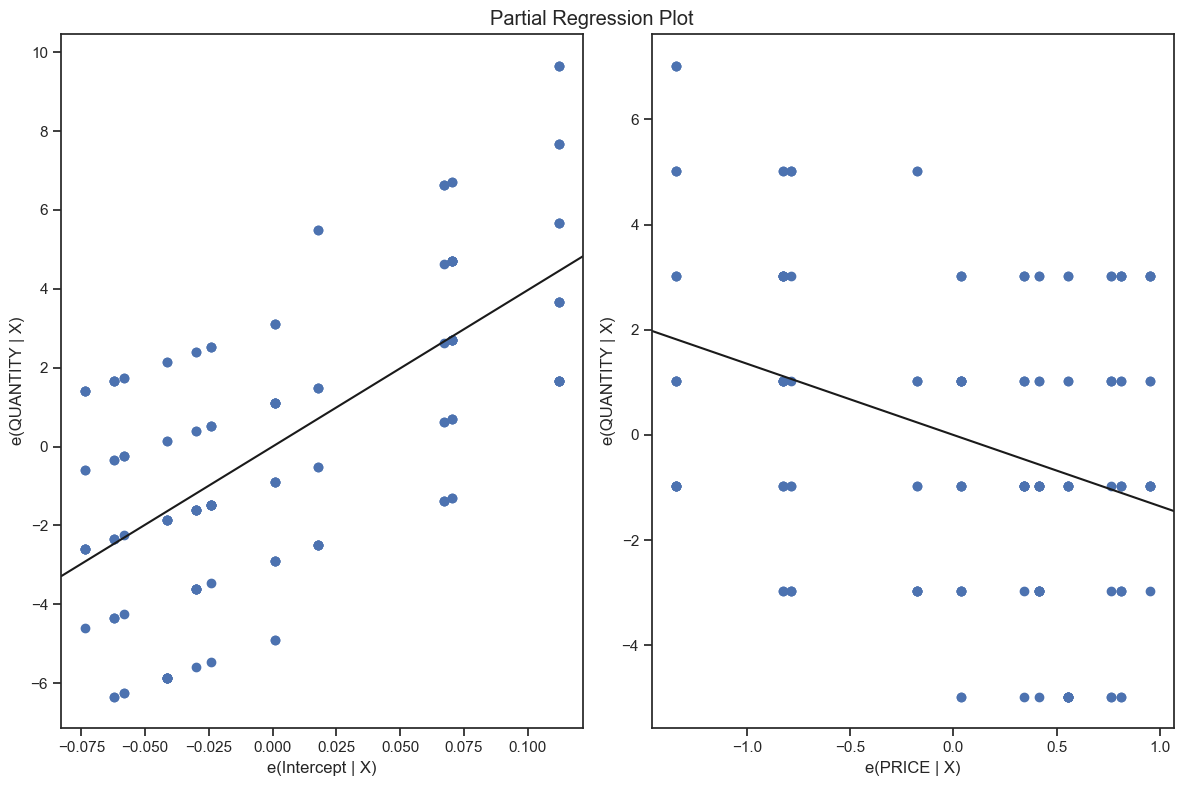

In [79]:
# for 2051 and other burger with unique sell id
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticiy of the product: -1.6395517886297852
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     39.31
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.15e-09
Time:                        14:40:29   Log-Likelihood:                -405.10
No. Observations:                 164   AIC:                             814.2
Df Residuals:                     162   BIC:                             820.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


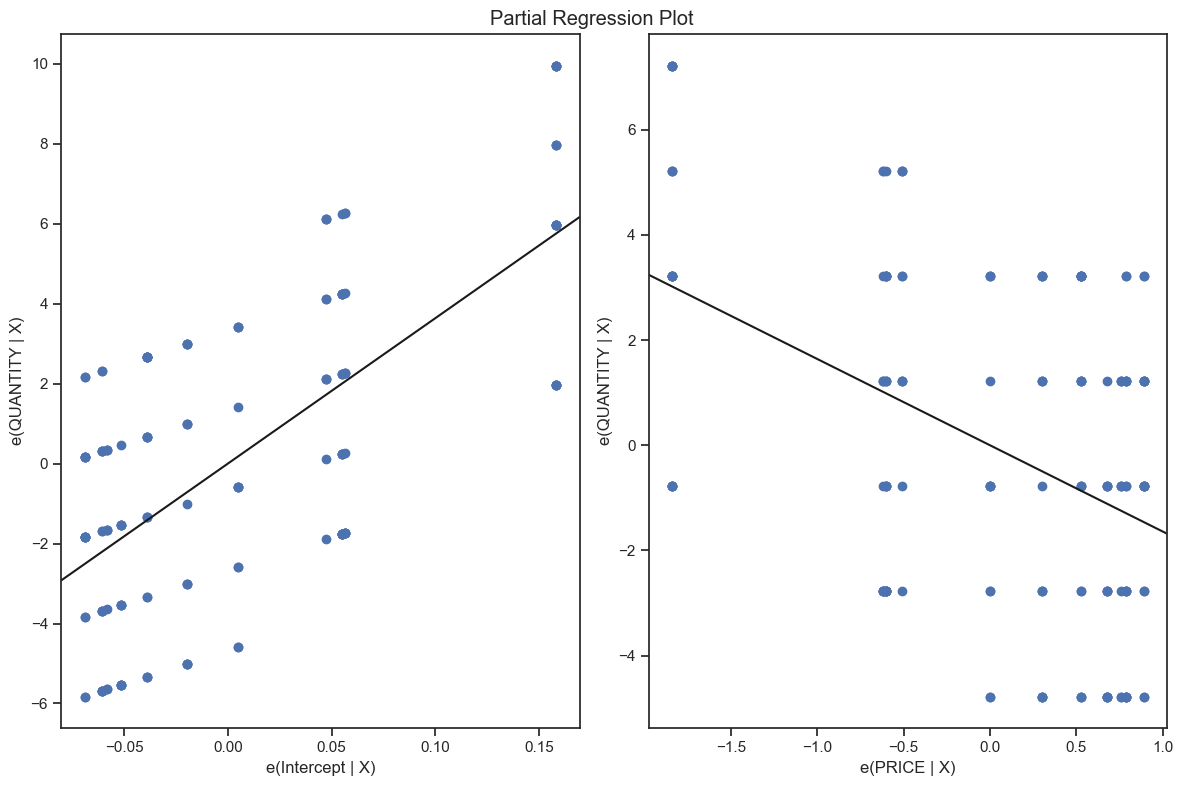

In [80]:
# burger 2052
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticiy of the product: -4.394053351507928
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.8
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.58e-42
Time:                        14:40:32   Log-Likelihood:                -410.58
No. Observations:                 164   AIC:                             825.2
Df Residuals:                     162   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

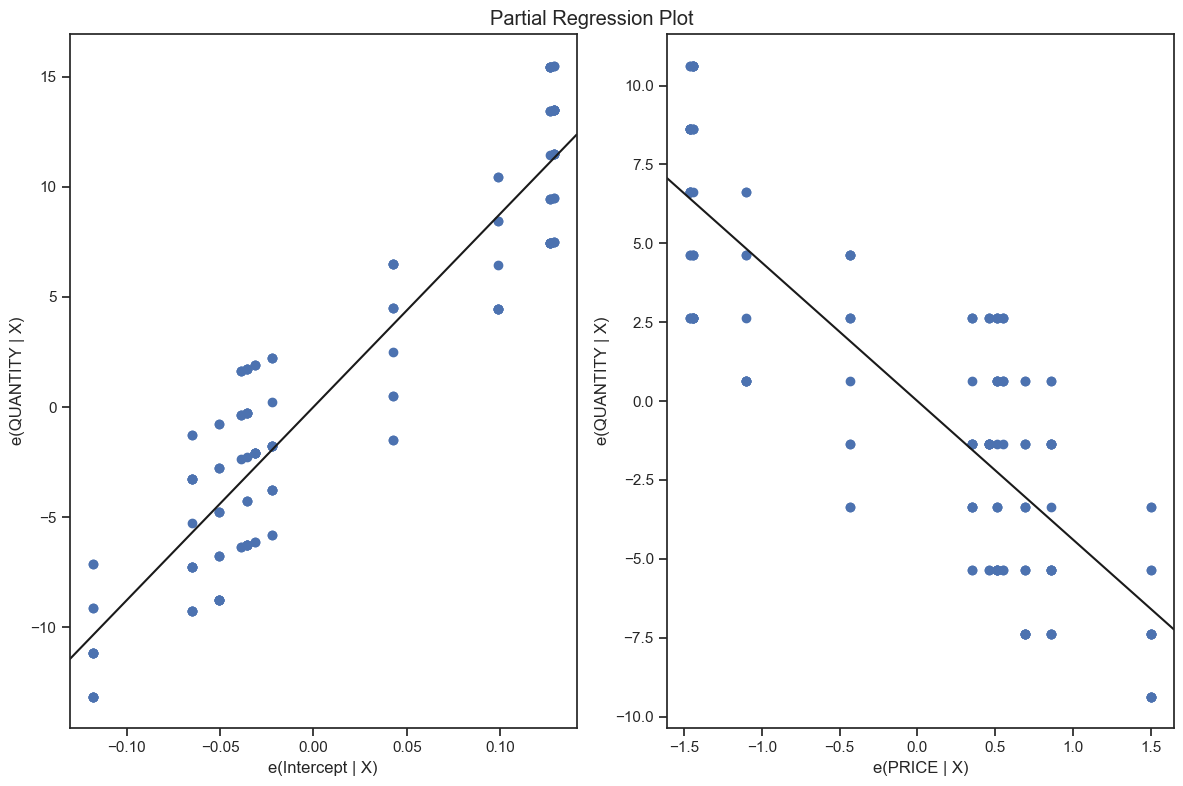

In [81]:
# burger 2053
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

* Now -5 and -4 seems to be particular price of burger for this very cafe.

Price elasticiy of the product: -4.692643684745979
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     149.2
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.63e-28
Time:                        14:40:37   Log-Likelihood:                -1065.0
No. Observations:                 328   AIC:                             2134.
Df Residuals:                     326   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

(-4.692643684745979,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b1461feb90>)

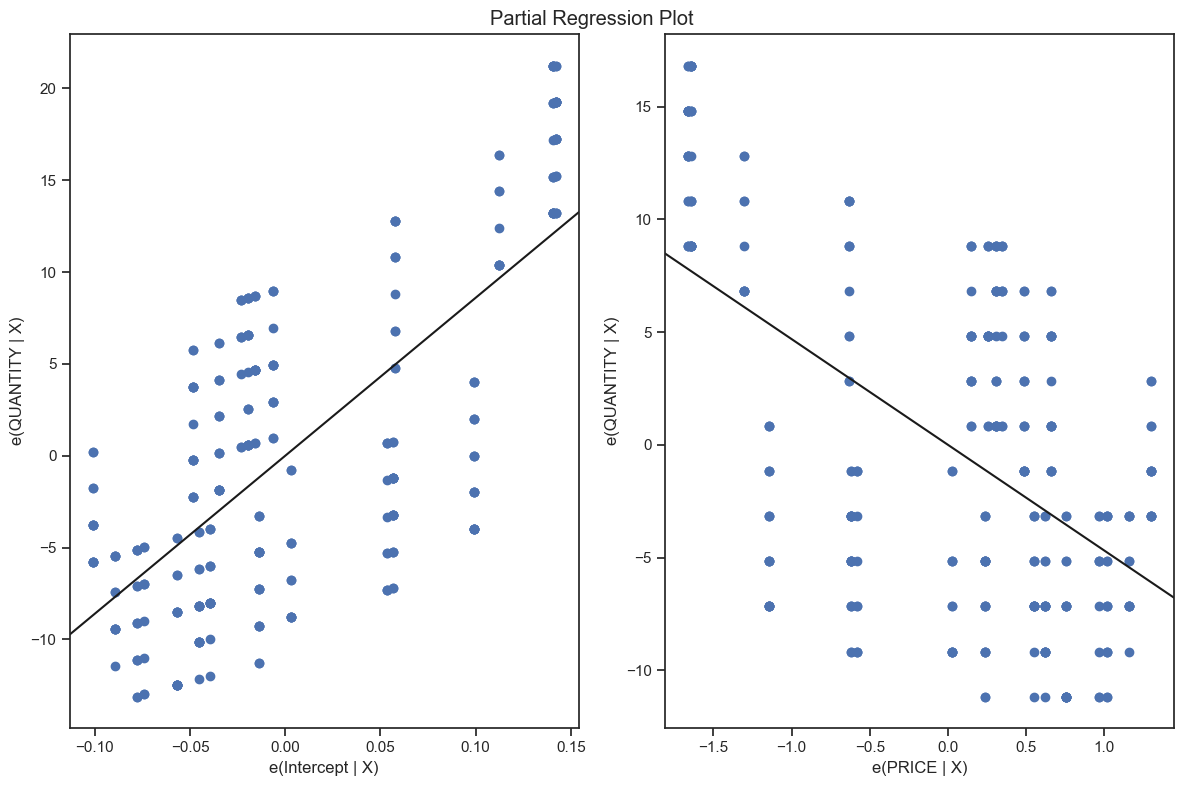

In [82]:
# coke data
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

* From this we can infer that they are two groups of cokes, one is selling individually and other we are getting combo

In [83]:
# Unlikely to purchase a single coke. no purchase of coke for sell id 3067
# coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
# elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

In [84]:
# coke_data

Price elasticiy of the product: -4.394053351507928
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.8
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.58e-42
Time:                        14:40:42   Log-Likelihood:                -410.58
No. Observations:                 164   AIC:                             825.2
Df Residuals:                     162   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

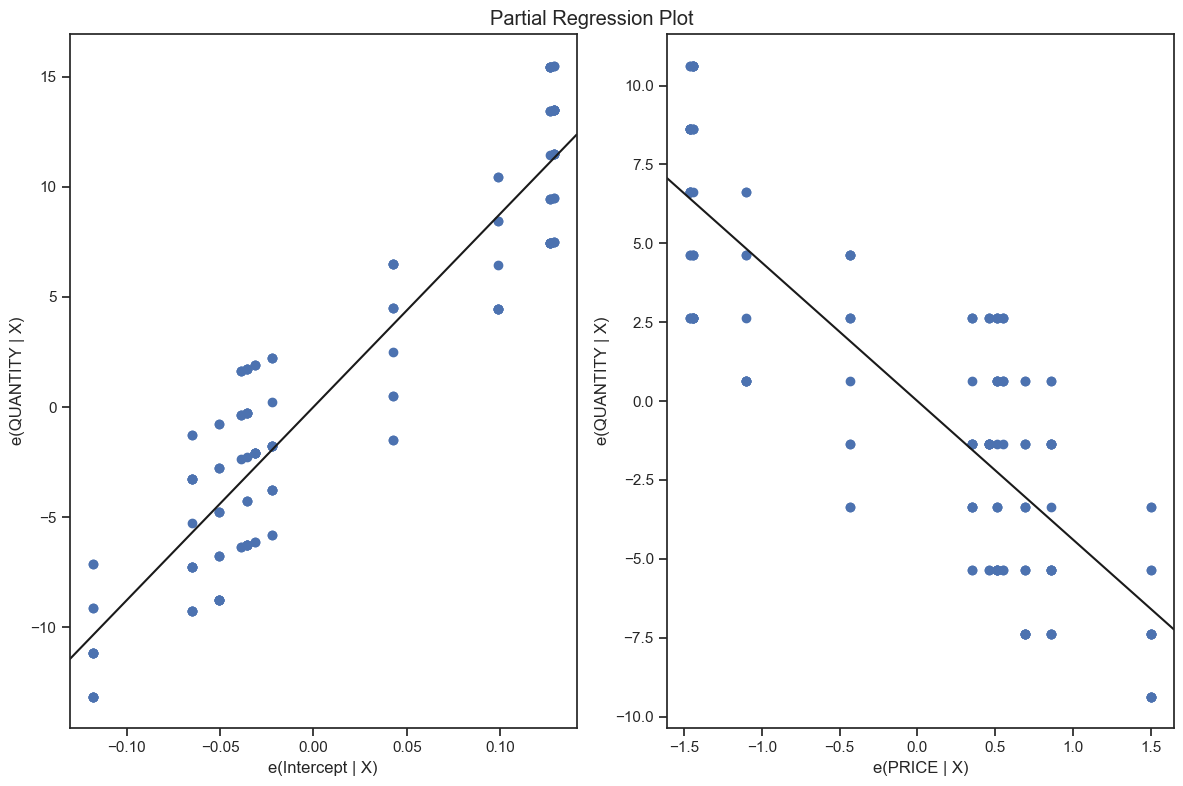

In [83]:
# 2053
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticiy of the product: -1.353355848070377
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     21.83
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.22e-06
Time:                        14:40:46   Log-Likelihood:                -397.46
No. Observations:                 164   AIC:                             798.9
Df Residuals:                     162   BIC:                             805.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

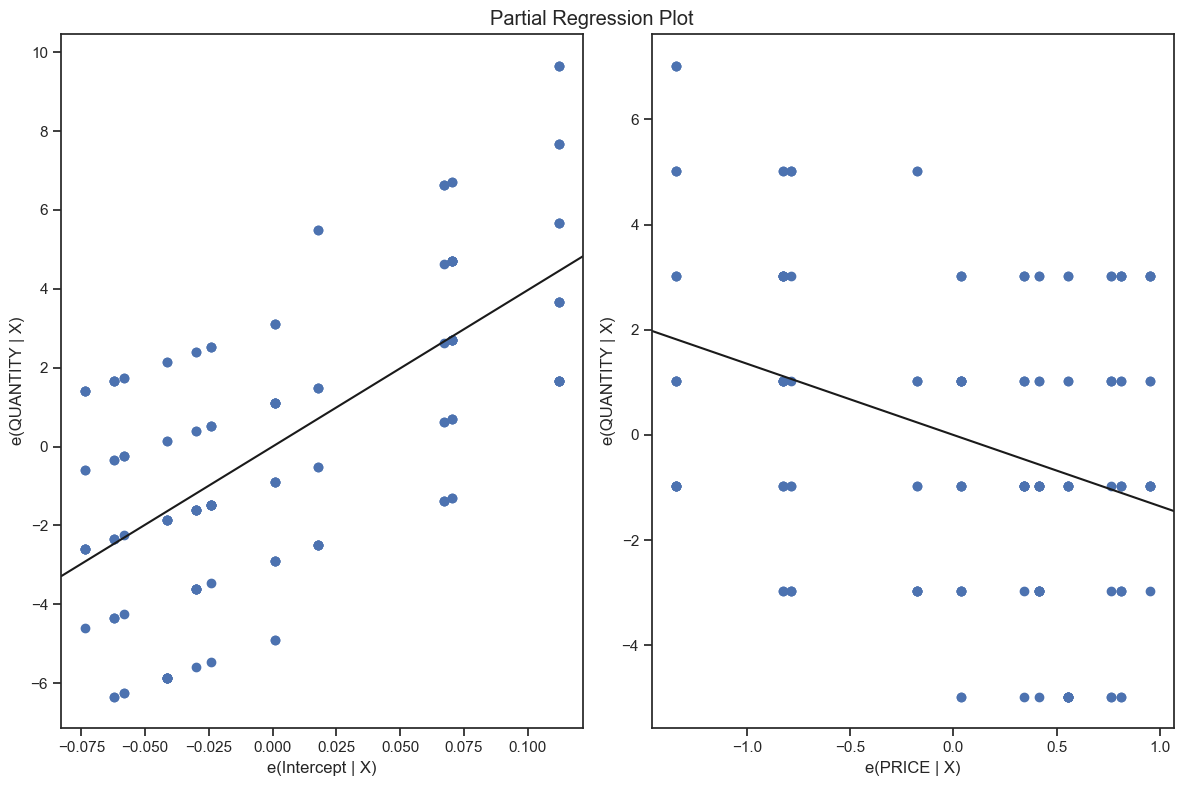

In [84]:
# 2051
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticiy of the product: -1.6395517886297852
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     39.31
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.15e-09
Time:                        14:40:50   Log-Likelihood:                -405.10
No. Observations:                 164   AIC:                             814.2
Df Residuals:                     162   BIC:                             820.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


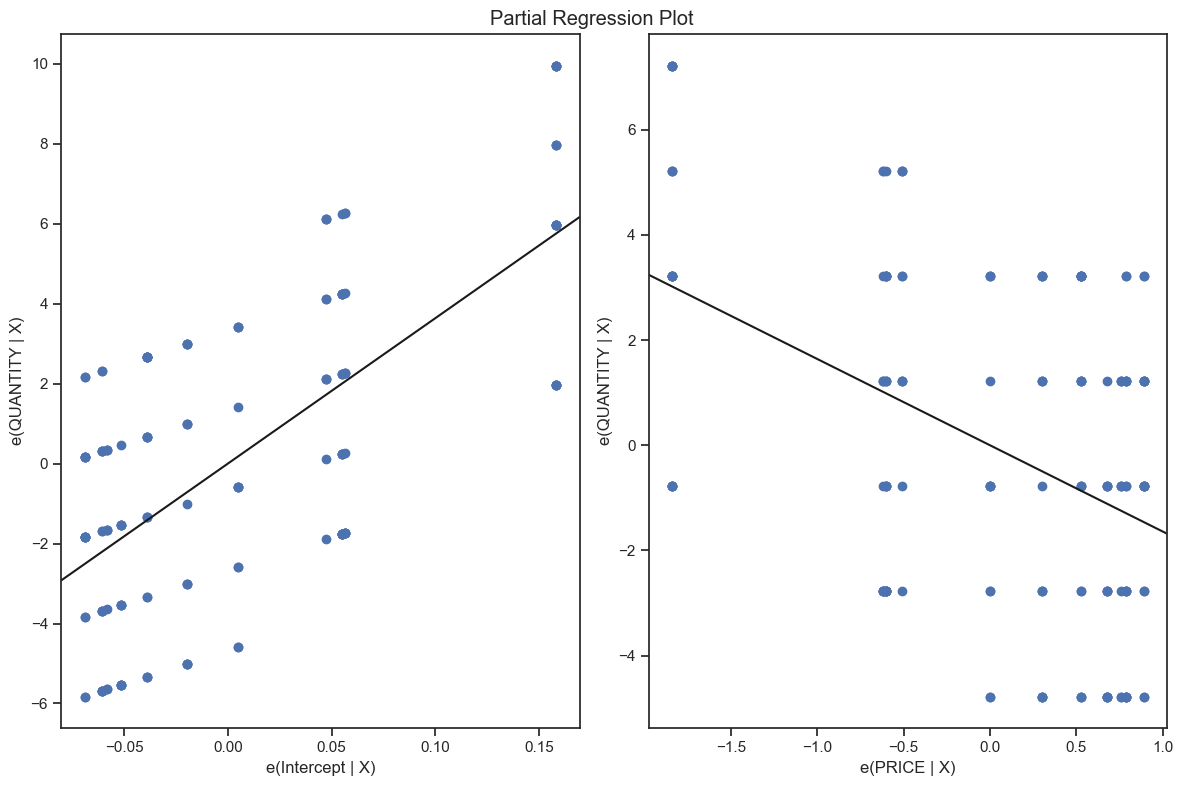

In [85]:
# Lemonde sell id 2052
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [88]:
# No transaction with this particular lemonade 3028
# lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
# elasticities['lemonade_3028'], model_lemonade_3028  = create_model_and_find_elasticity(lemonade_data_3028)

Price elasticiy of the product: -4.394053351507928
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.8
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.58e-42
Time:                        14:40:54   Log-Likelihood:                -410.58
No. Observations:                 164   AIC:                             825.2
Df Residuals:                     162   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

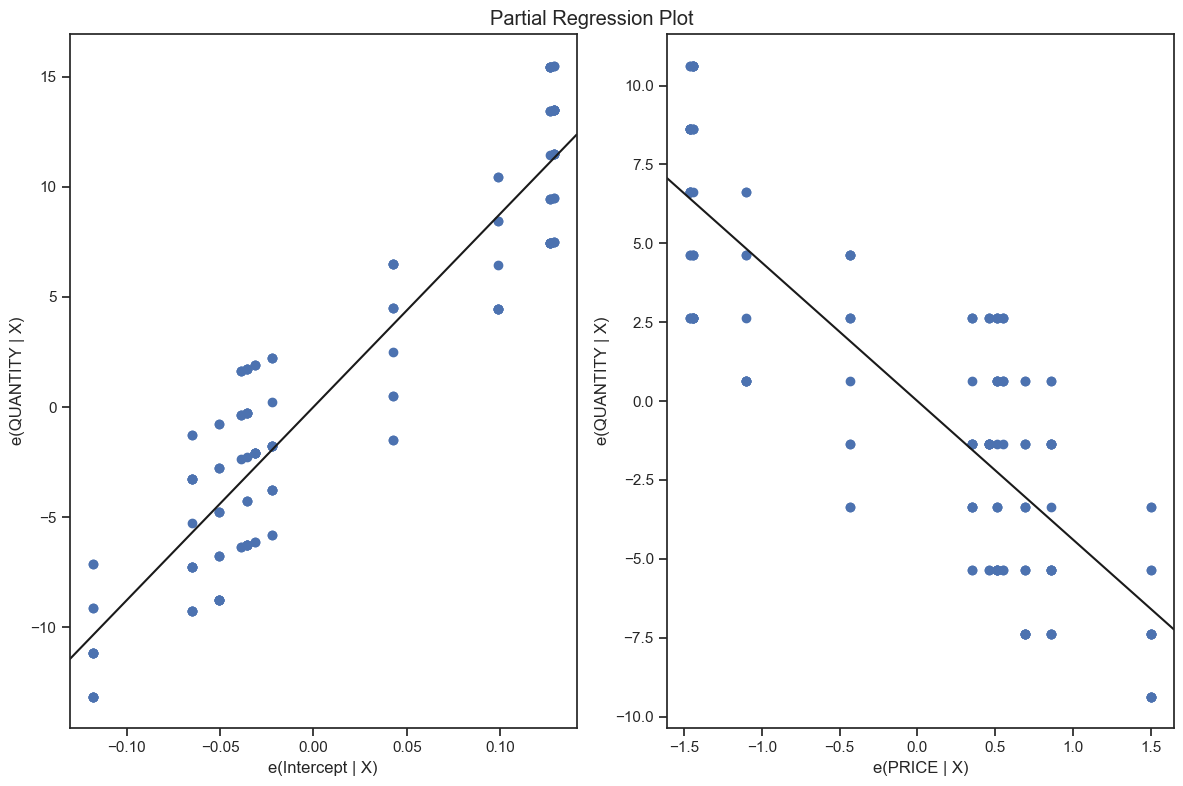

In [86]:
# coffee with sell id 2053
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [90]:
# No transaction for coffee with sell id 3055
# coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
# elasticities['coffee_3055'], model_coffee_3055  = create_model_and_find_elasticity(coffee_data_3055)

#### listing the elasticities in table

In [87]:
elasticities

{'burger_1070': -5.351266740100881,
 'burger_2051': -1.353355848070377,
 'burger_2052': -1.6395517886297852,
 'burger_2053': -4.394053351507928,
 'coke_2053': -4.394053351507928,
 'coke_2051': -1.353355848070377,
 'lemonade_2052': -1.6395517886297852,
 'coffee_2053': -4.394053351507928}

<a name='7.1'></a>
#### Optimal Price for Maximum Profit

* Let's take coke and since we do not know the buying price of coke, let's assume it to be a little less than the minimum coke price in the dataset

In [88]:
coke_data.PRICE.min()

10.45

In [89]:
coke_data.PRICE.max()

13.41

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is selling price

In [90]:
buying_price_coke = 9

$$PROFIT = (Sell_{price} - Buy_{price})* QUANTITY$$

* Let's see the profit for various price points

In [91]:
# random price points that make sense
start_price = 9.5
end_price = 20

In [92]:
# test dataset
test = pd.DataFrame(columns= [ "PRICE", "QUANTITY"])

In [93]:
# price in step of 0.01 and denominations increase in that sense
test["PRICE"] = np.arange(start_price, end_price, 0.01)

In [94]:
# quantity for 2051
test["QUANTITY"] = model_coke_2051.predict(test["PRICE"])

In [96]:
test.head()

,PRICE,QUANTITY
0,9.50,26.785967
1,9.51,26.772433
2,9.52,26.758900
3,9.53,26.745366
4,9.54,26.731832


In [97]:
# Profit
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test['QUANTITY'] 

In [98]:
test.head()

,PRICE,QUANTITY,PROFIT
0,9.50,26.785967,13.392983
1,9.51,26.772433,13.653941
2,9.52,26.758900,13.914628
3,9.53,26.745366,14.175044
4,9.54,26.731832,14.435190


Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity (blue) / Profit (orange)')

Text(0.5, 1.0, 'Optimal Pricing Analysis')

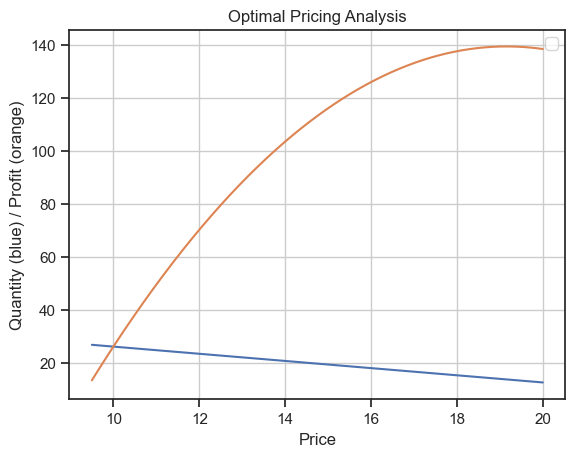

In [103]:
# lest visualize the tabular form above
plt.plot(test['PRICE'], test['QUANTITY'])
plt.plot(test['PRICE'], test['PROFIT'])

# Adding labels and title
plt.xlabel("Price")  # X-axis label
plt.ylabel("Quantity (blue) / Profit (orange)")  # Y-axis label
plt.title("Optimal Pricing Analysis")  # Optional: Add a title
plt.legend()  # Add legend for clarity
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

* Price against quantity in blue line and price and profit in orange line, we need to need to identify the max point on orange curve
* Let's find exact price for maximum profit is gained.

In [103]:
# figure out the index point for max profit
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [104]:
# Row index , this will only be profit on a particular day. This will help do some inventory planning on a normal day
# not considering special days like holidays.
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
965,19.15,13.726083,139.319739


In [105]:
# Generic function for optimal price
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1              # start price
    end_price = data.PRICE.min() + 10               # end price
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])  # choose required columns
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])         # make predictions
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

<a name='7.2'></a>
#### Calculate the optimal price for all and list in table

In [106]:
# dict of optimal price and set min bying price to be 9 due to initial scatter plot of price and quantity of combined data
optimal_price = {}
buying_price = 9

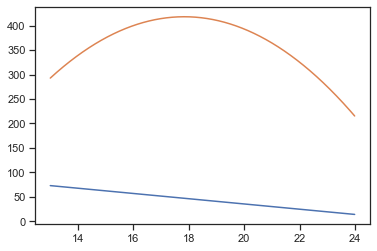

In [107]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

* No cross over in profit curve and the quantity curve for this particular burger 1070 so prolly much profit made when sold individually

In [108]:
# optimal price
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 484  17.84  47.276517  417.924409}

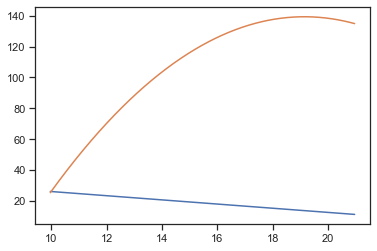

In [109]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

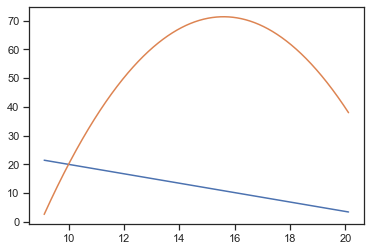

In [110]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

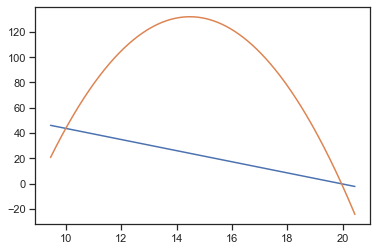

In [111]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

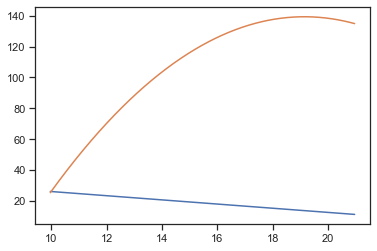

In [112]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

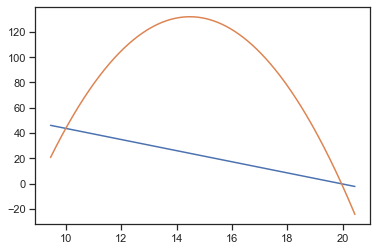

In [113]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

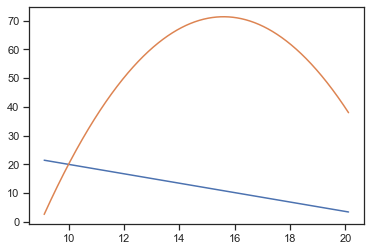

In [114]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

In [115]:
# optimal price 
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 484  17.84  47.276517  417.924409,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 918  19.15  13.726083  139.319739,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 648   15.6  10.812419  71.361968,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 503  14.48  24.074744  131.929598,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 918  19.15  13.726083  139.319739,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 503  14.48  24.074744  131.929598,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 648   15.6  10.812419  71.361968}

In [116]:
# look at initial price
coke_data_2051.PRICE.describe()

count    164.000000
mean      12.315488
std        0.743054
min       10.970000
25%       11.530000
50%       12.660000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

<a name='8'></a>
### Conclusion

* Here we see that max price was 13.27 when the optimal price could be 19.15 for maximum profit . this means the cafe was loosing in profit. but if they had sold for 19.15 the sales may decrease, quantity been sold will decrease off course but profit will increase

* Not this is on a normal day, or all other days like holiday or an event taking place, they  various impacts on the customers buying patterns and usually an increase in consumption is seen on these days, These must be treated differently

* Similarly it is important to remove any external effects other than price that will affect the purchase behaviors of customers including the data points where the  items was on discount. In this case there where no item on discount. 

* Now that we have these new price points for each items, once they are set up is important to continuously monitoring the sales and profits made out of these items. A dashboard can be created to monitor these types of problem and lifting profits(Increasing profits)